In [1]:
import os
os.chdir("../../")

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
import jsonlines
import pandas as pd

In [21]:
results_entity_increase_address = "../results/final1/lf/met/sd-gen/setup4/run1/aft_increase/test/result_per_entity.xlsx"
results_entity_ind_address = "../results/final1/lf/met/sd-gen/setup4/run1/aft_ind/test/result_per_entity.xlsx"
model_type="sd_gen"

results_entity_increase = pd.read_excel(results_entity_increase_address)
results_entity_ind = pd.read_excel(results_entity_ind_address)

In [22]:
documents_orig = [
    "Aladdin_0",
    "Alibaba_0",
    "alice_0"
]

In [23]:
num_entity_analysis = {
    "doc_key": [],
    "entity_name": [],
    "f1_score": [],
    "num_entities": [],
    "support": []
}

entity_vs_support = {
    "Aladdin_0": {},
    "Alibaba_0": {},
    "alice_0": {}
}

for row in results_entity_ind.iterrows():
    row = row[1]
    doc_name = row["doc_name"]
    for name in documents_orig:
        if doc_name.startswith(name):
            doc_key = name
            break
    entity_name = row["entity_name"]
    f1_score = row["f1_score"]
    # num_entities = int(doc_name.split(doc_key)[1][1:])
    num_entities = 1
    
    num_entity_analysis["doc_key"].append(doc_key)
    num_entity_analysis["entity_name"].append(f"{entity_name}({row['support']})")
    num_entity_analysis["f1_score"].append(f1_score)
    num_entity_analysis["num_entities"].append(num_entities)
    num_entity_analysis["support"].append(row["support"])
    entity_vs_support[doc_key][f"{entity_name}({row['support']})"] = row["support"]

for row in results_entity_increase.iterrows():
    row = row[1]
    doc_name = row["doc_name"]
    for name in documents_orig:
        if doc_name.startswith(name):
            doc_key = name
            break
    entity_name = row["entity_name"]
    f1_score = row["f1_score"]
    num_entities = int(doc_name.split(doc_key)[1][1:])
    # num_entities = 1
    
    num_entity_analysis["doc_key"].append(doc_key)
    num_entity_analysis["entity_name"].append(f"{entity_name}({row['support']})")
    num_entity_analysis["f1_score"].append(f1_score)
    num_entity_analysis["num_entities"].append(num_entities)
    num_entity_analysis["support"].append(row["support"])
    entity_vs_support[doc_key][f"{entity_name}({row['support']})"] = row["support"]

num_entity_analysis = pd.DataFrame(num_entity_analysis)
## drop duplicates
num_entity_analysis = num_entity_analysis.drop_duplicates()

In [24]:
# entity_aladdin = entity_aladdin.sort_values(by='support', ascending=False)
# entity_aladdin.reset_index(drop=True, inplace=True)

In [25]:
plt.style.use('bmh')
plt.rc('text', usetex=True)   #  Might require installing TeX fonts
plt.rc('axes', facecolor='w', labelcolor='b', edgecolor='k', labelsize=16)
plt.rcParams['font.size'] = 18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
## X and Y axis labels font size
plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 8
## Remove grid lines
plt.rcParams['axes.grid'] = False
plt.tight_layout(pad=0.07)
sns.set_style("white")

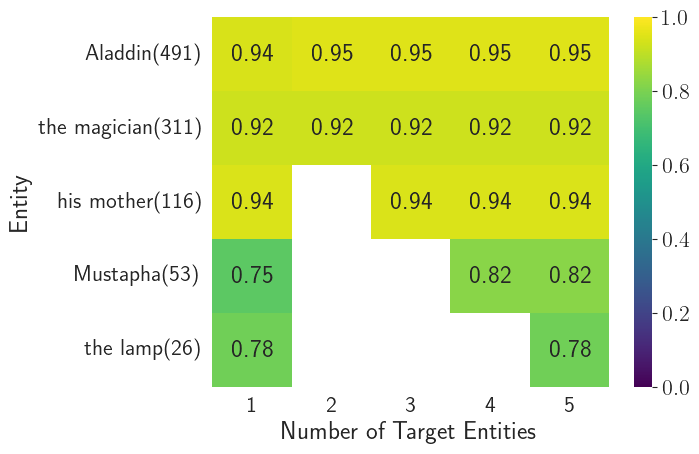

In [26]:
# plt.figure(figsize=(10, 6))
entity_aladdin = num_entity_analysis[num_entity_analysis["doc_key"] == "Aladdin_0"]
entity_aladdin = entity_aladdin.pivot(index="entity_name", columns="num_entities", values="f1_score")
sorted_keys, _ = zip(*sorted(entity_vs_support["Aladdin_0"].items(), key=lambda x: x[1], reverse=True))
entity_aladdin = entity_aladdin.reindex(sorted_keys)
## Set x and y labels as :"Entity" and "Number of Target Entities"
entity_aladdin.index.name = "Entity"
entity_aladdin.columns.name = "Number of Target Entities"
## Plot the heatmap
sns.heatmap(entity_aladdin,cmap="viridis", cbar=True, vmin=0, vmax=1, annot=True,)
## Save plot as pdf
plt.savefig(f"var_images/aladdin_{model_type}.pdf", bbox_inches='tight',format="pdf")
plt.show()

num_entities               1         2         3         4         5  \
entity_name                                                            
Alibaba's wife(56)  0.531250       NaN       NaN       NaN       NaN   
Alibaba(235)        0.807339  0.783542  0.960526  0.960526  0.960526   
Baba Mustapha(133)  0.928302       NaN  0.957198  0.957198  0.957198   
Cassim's wife(99)   0.697872       NaN       NaN  0.697872  0.697872   
Cassim(169)         0.919403  0.927711  0.927711  0.927711  0.927711   
Morgiana(65)        0.952381       NaN       NaN       NaN       NaN   
the captain(28)     0.851852       NaN       NaN       NaN       NaN   
the door(33)        0.927536       NaN       NaN       NaN       NaN   
the robbers(88)     0.619835       NaN       NaN       NaN  0.622407   

num_entities               6         7         8         9  
entity_name                                                 
Alibaba's wife(56)       NaN  0.531250  0.531250  0.531250  
Alibaba(235)        0.96

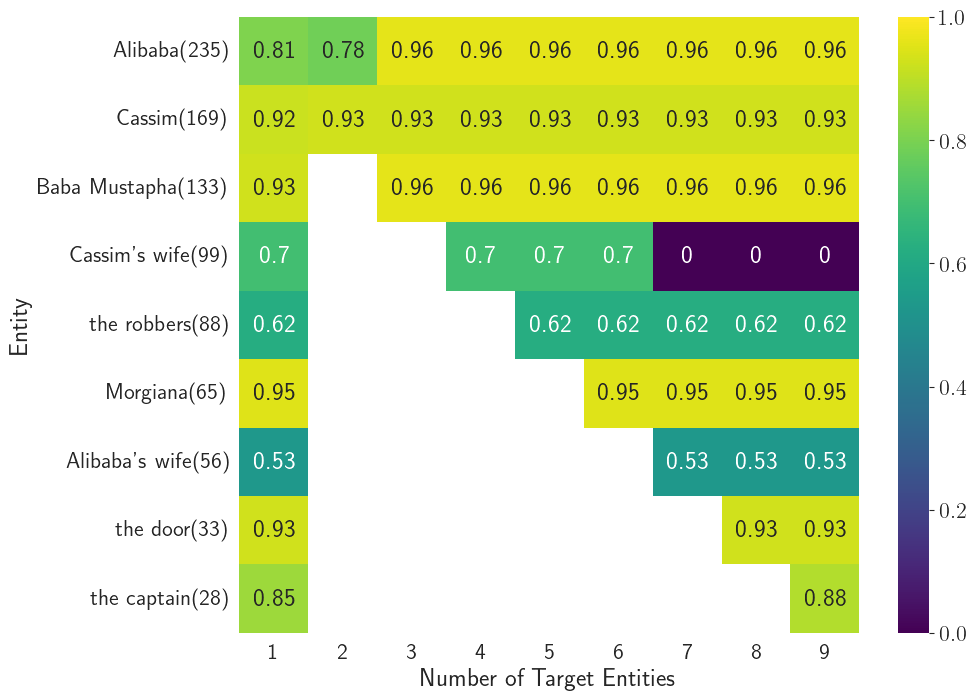

In [27]:
entity_alibaba = num_entity_analysis[num_entity_analysis["doc_key"] == "Alibaba_0"]
### Hack
## Find his wife in entity name and replace with Alibaba's wife
entity_alibaba.loc[entity_alibaba['entity_name'] == 'his wife(56)', 'entity_name'] = "Alibaba's wife(56)"
if "his wife(56)" in entity_vs_support["Alibaba_0"]:
    entity_vs_support["Alibaba_0"]["Alibaba's wife(56)"] = entity_vs_support["Alibaba_0"].pop("his wife(56)")
# print(entity_alibaba)
# entity_alibaba['entity_name'].replace('his wife', "Alibaba's wife", inplace=True)
entity_alibaba = entity_alibaba.pivot(index="entity_name", columns="num_entities", values="f1_score")
print(entity_alibaba)
sorted_keys, _ = zip(*sorted(entity_vs_support["Alibaba_0"].items(), key=lambda x: x[1], reverse=True))
entity_alibaba = entity_alibaba.reindex(sorted_keys)
plt.figure(figsize=(10, 8)) 
## Set x and y labels as :"Entity" and "Number of Target Entities"
entity_alibaba.index.name = "Entity"
entity_alibaba.columns.name = "Number of Target Entities"
sns.heatmap(entity_alibaba,cmap="viridis", cbar=True, vmin=0, vmax=1, annot=True)
plt.savefig(f"var_images/alibaba_{model_type}.pdf", bbox_inches='tight',format="pdf")
plt.show()

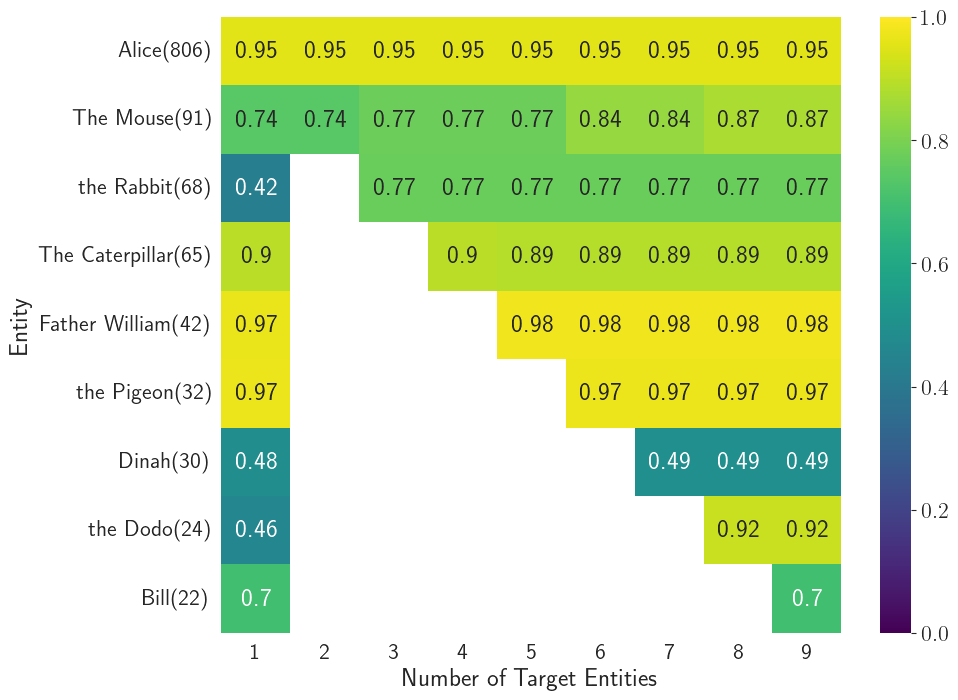

In [28]:
entity_alice = num_entity_analysis[num_entity_analysis["doc_key"] == "alice_0"]
entity_alice = entity_alice.pivot(index="entity_name", columns="num_entities", values="f1_score")
sorted_keys, _ = zip(*sorted(entity_vs_support["alice_0"].items(), key=lambda x: x[1], reverse=True))
entity_alice = entity_alice.reindex(sorted_keys)
## Set x and y labels as :"Entity" and "Number of Target Entities"
entity_alice.index.name = "Entity"
entity_alice.columns.name = "Number of Target Entities"
plt.figure(figsize=(10, 8))
sns.heatmap(entity_alice,cmap="viridis", cbar=True, vmin=0, vmax=1, annot=True)
plt.savefig(f"var_images/alice_{model_type}.pdf", bbox_inches='tight',format="pdf")
plt.show()